In [1]:
import autosklearn.classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o classificador Auto-Sklearn
cls = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=300, per_run_time_limit=60)


cls.fit(X_train, y_train)

predictions = cls.predict(X_test)

[WARNING] [2024-06-22 19:18:52,698:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2024-06-22 19:18:54,211:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2024-06-22 19:18:55,755:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2024-06-22 19:18:57,294:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2024-06-22 19:19:06,116:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2024-06-22 19:19:13,545:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] 

In [3]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



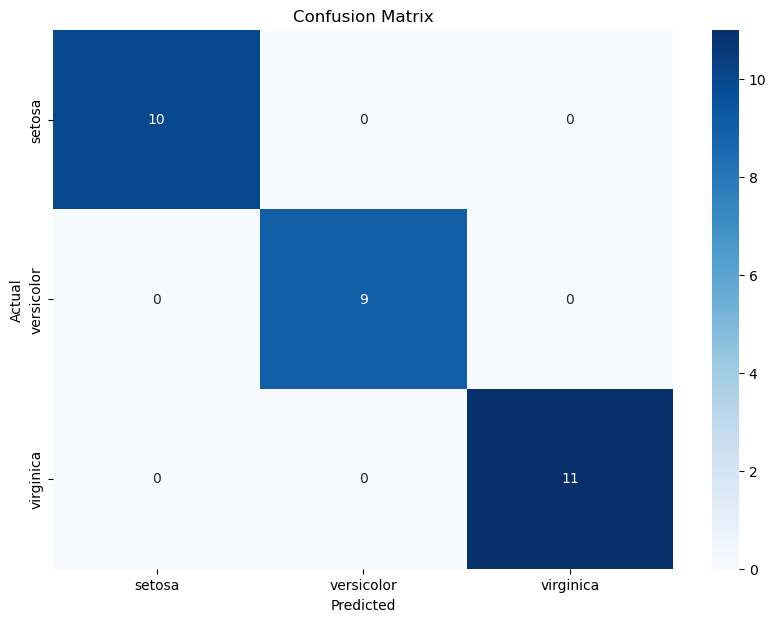

In [4]:
# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
print(cls.leaderboard())

          rank  ensemble_weight                type   cost  duration
model_id                                                            
30           1             0.06         gaussian_nb  0.000  1.450158
40           3             0.12         gaussian_nb  0.000  1.522086
43           2             0.08         gaussian_nb  0.000  1.565078
10           6             0.02                 mlp  0.025  2.503393
49           7             0.02                 lda  0.025  1.556587
51           5             0.04         extra_trees  0.025  3.186444
54           4             0.06         gaussian_nb  0.025  1.480954
21           8             0.02         extra_trees  0.050  2.749280
23           9             0.02         extra_trees  0.050  2.263495
46          10             0.06         extra_trees  0.050  2.645056
29          12             0.02         extra_trees  0.075  2.418840
53          11             0.02                 lda  0.075  5.566705
4           13             0.04  p